# 点扩散函数仿真
## CHIPY
本文档示例了使用hcipy进行仿真的过程

In [2]:
%reload_ext autoreload
%autoreload 2

from csst_cpic_sim.psf_simulation import single_band_psf, single_band_masked_psf
from csst_cpic_sim.utils import psf_imshow
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits



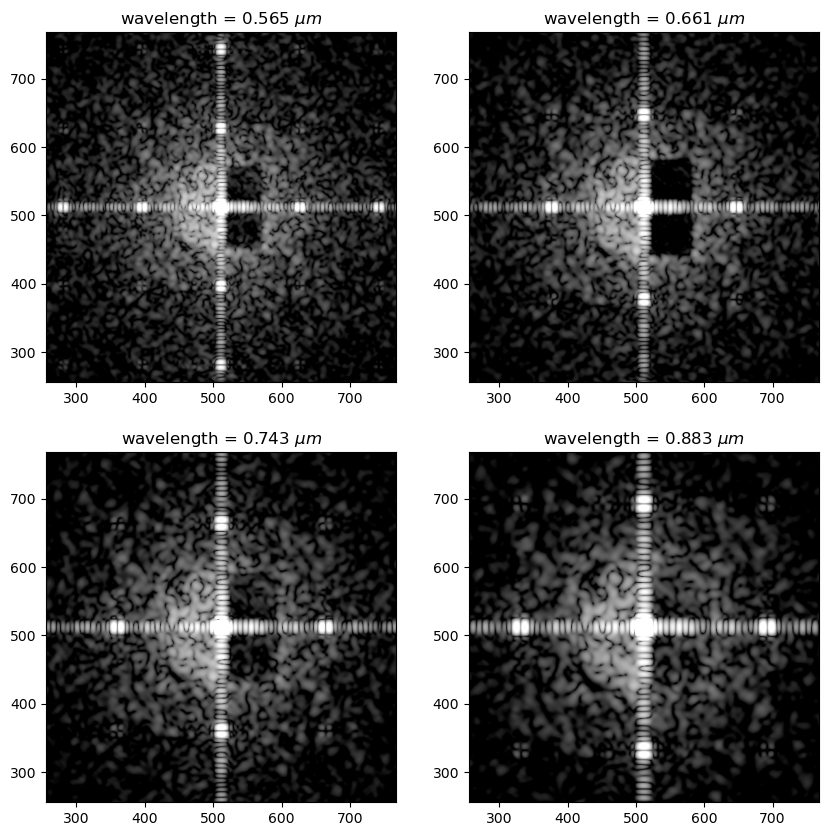

In [21]:
plt.figure(figsize=(10, 10))

def psf_imshow(psf):
    focal_img = psf.copy()
    focal_img = np.maximum(focal_img, 1e-10)
    focal_img = np.minimum(focal_img, focal_img.max()*0.0001)
    image_log = np.log10(focal_img)
    plt.imshow(image_log, origin='lower', cmap='gray')

for i, wavelength in enumerate([565e-9, 661e-9, 743e-9, 883e-9]):
    psf = single_band_psf(wavelength, error=0)
    plt.subplot(2, 2, i+1)
    psf_imshow(psf)
    plt.title(f'wavelength = {wavelength*1e6} $\mu m$')
    plt.xlim([256, 768])
    plt.ylim([256, 768])


Text(0, 0.5, 'normalized intensity')

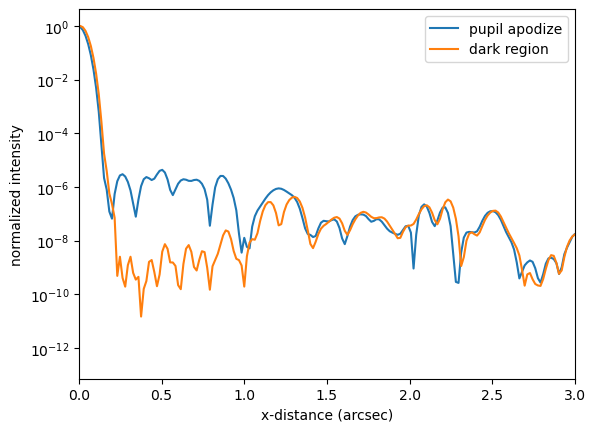

In [17]:
wavelength = 661e-9
psf = single_band_psf(wavelength, error=0)
x = np.arange(psf.shape[0])
x = x - x.max()/2
x = x * 0.016

plt.semilogy(-x, np.einsum('ii->i', psf)/psf.max(), label='pupil apodize')
plt.semilogy(x, np.einsum('ii->i', psf)/psf.max(), label='dark region')

# plt.semilogy(-x, np.einsum('ii->i', psf)/psf.max())
plt.xlim([0, 3])
plt.legend()
plt.xlabel('x-distance (arcsec)')
plt.ylabel('normalized intensity')

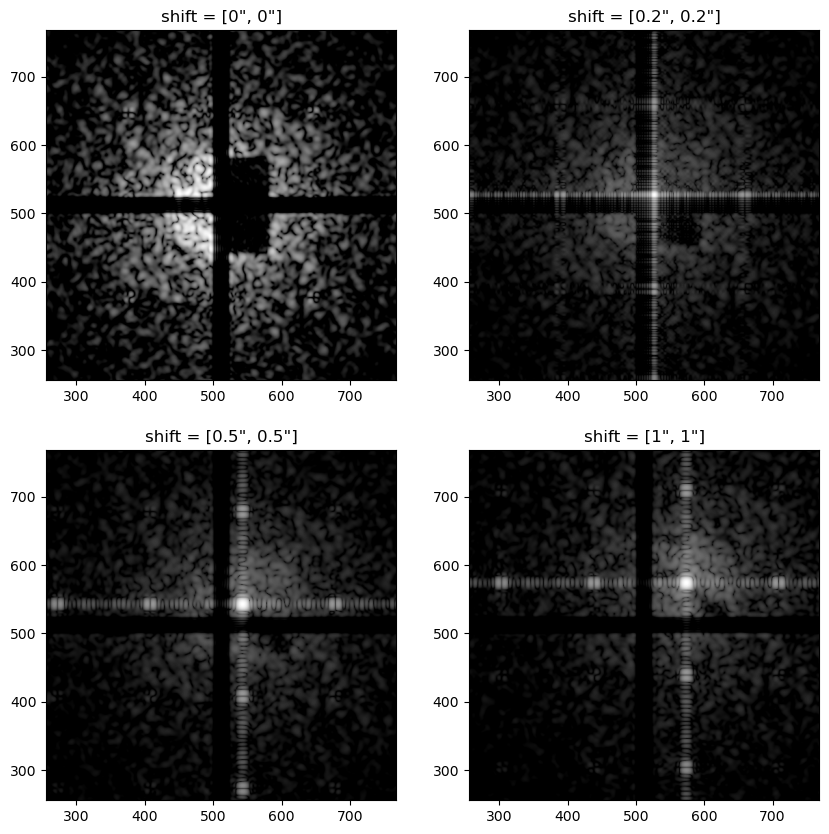

In [23]:
plt.figure(figsize=(10, 10))

def psf_imshow(psf):
    focal_img = psf.copy()
    focal_img = np.maximum(focal_img, 1e-10)
    focal_img = np.minimum(focal_img, focal_img.max())
    image_log = np.log10(focal_img)
    plt.imshow(image_log, origin='lower', cmap='gray')

shift = [0, 0]
for i, shift in enumerate([
    [0, 0], [0.2, 0.2],
    [0.5, 0.5], [1, 1]
]):
    wavelength = 661e-9
    psf = single_band_masked_psf(wavelength, error=0, shift=shift)
    plt.subplot(2, 2, i+1)
    psf_imshow(psf)
    plt.title(f'shift = [{shift[0]}", {shift[1]}"]')
    plt.xlim([256, 768])
    plt.ylim([256, 768])



(442.0, 582.0)

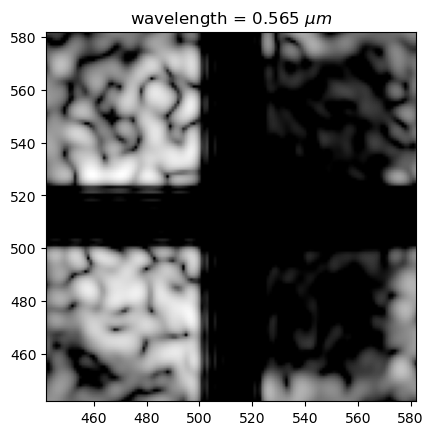

In [13]:
def psf_imshow(psf):
    focal_img = psf.copy()
    focal_img = np.maximum(focal_img, 3e-10)
    focal_img = np.minimum(focal_img, focal_img.max())
    image_log = np.log10(focal_img)
    plt.imshow(image_log, origin='lower', cmap='gray')

wavelength = 565e-9
psf = single_band_masked_psf(wavelength, error=0)
psf_imshow(psf)
plt.title(f'wavelength = {wavelength*1e6} $\mu m$')
d = 70
plt.xlim([512-d, 512+d])
plt.ylim([512-d, 512+d])